In [3]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('../')
from utiliT.io import read_pickle, dump_pickle

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
if os.path.isfile("../results/compiled_results/experimental_results.csv"):
    df = pd.read_csv("../results/compiled_results/experimental_results.csv", index_col=0)
else:
    result_files = os.listdir("../results/run_results")
    result_dicts = [read_pickle(f"../results/run_results/{file}") for file in result_files]
    df = pd.DataFrame(result_dicts)
    df['n_var'] = df['n1'] + df['n2'] * df['k']
    df['adj_runtime'] = df['runtime'] - df['clustering_runtime']
    df.to_csv('../results/compiled_results/experimental_results.csv')
    #df.to_csv("../results/compiled_results/experimental_results.csv")
df.head()

,grouping_method,obj_val,dr,cut_method,n_cuts,n_iterations,avg_mp_solve,avg_benders_loop_solve,status,primal_gap,...,n2,m1,m2,k,distribution,clustering_runtime,instance_name,run_number,n_var,adj_runtime
0,affinity,24349.816697,False,dropout,113,14,0.002395,0.152668,optimal,0.0,...,100,200,200,100,multipeak,0.086751,multipeak_100_100_100,0,10100,2.783954
1,affinity,24349.816697,False,dropout,113,14,0.002241,0.147174,optimal,0.0,...,100,200,200,100,multipeak,0.074818,multipeak_100_100_100,1,10100,2.680137
2,affinity,24349.816697,False,dropout,113,14,0.002402,0.148048,optimal,0.0,...,100,200,200,100,multipeak,0.072729,multipeak_100_100_100,2,10100,2.716534
3,hierarchical,23999.852191,False,dropout,42,26,0.000601,0.028119,optimal,0.0,...,100,200,200,100,multipeak,0.045808,multipeak_100_100_100,0,10100,1.582456
4,hierarchical,23999.852191,False,dropout,42,26,0.002485,0.027117,optimal,0.0,...,100,200,200,100,multipeak,0.034805,multipeak_100_100_100,1,10100,1.545411


In [5]:
df.columns

Index(['grouping_method', 'obj_val', 'dr', 'cut_method', 'n_cuts',
       'n_iterations', 'avg_mp_solve', 'avg_benders_loop_solve', 'status',
       'primal_gap', 'primal_gap_perc', 'runtime', 'n1', 'n2', 'm1', 'm2', 'k',
       'distribution', 'clustering_runtime', 'instance_name', 'run_number',
       'n_var', 'adj_runtime'],
      dtype='object')

In [6]:
data = df.groupby(
    ['grouping_method', 'cut_method','n1', 'n2', 'm1' ,'m2', 'k', 'distribution','instance_name', 'n_var']
).mean().reset_index()
data.loc[data["cut_method"] == 'multi', "grouping_method"] = "multi"
data.loc[data["cut_method"] == 'single', "grouping_method"] = "single"
#data['grouping_method'].unique()

In [7]:
data.loc[data["cut_method"] == 'multi', "grouping_method"] = "multi"
data.loc[data["cut_method"] == 'single', "grouping_method"] = "single"
data['grouping_method'].unique()

array(['multi', 'single', 'affinity', 'hierarchical', 'kmeans', 'random',
       'spectral'], dtype=object)

## Hybrid Cut Analysis

[Text(0.5, 0, 'Runtime (s)'), Text(0, 0.5, '% of Instances')]

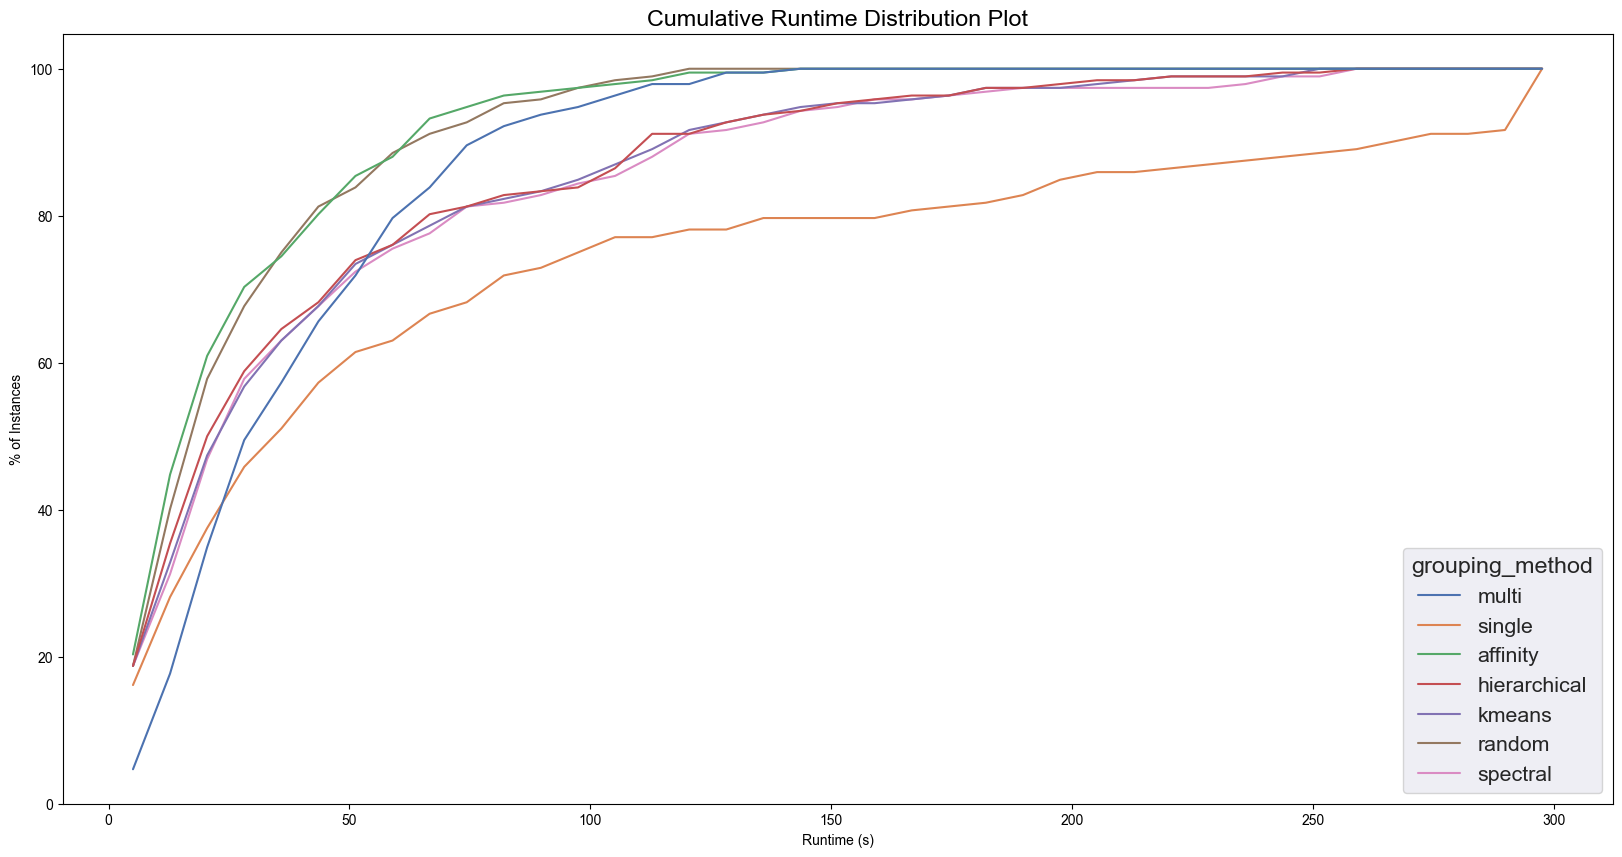

In [8]:
subset = data[data['cut_method'] != 'dropout']

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.4)
plot = sns.histplot(data = subset,x = 'runtime',hue = 'grouping_method',
                    element='poly', fill = False, cumulative=True,
                    stat = "percent", common_norm=False, ax = ax)
plot.set(title='Cumulative Runtime Distribution Plot')
plot.set(xlabel='Runtime (s)', ylabel='% of Instances')

[Text(0.5, 0, 'Runtime (s)'), Text(0, 0.5, '% of Instances')]

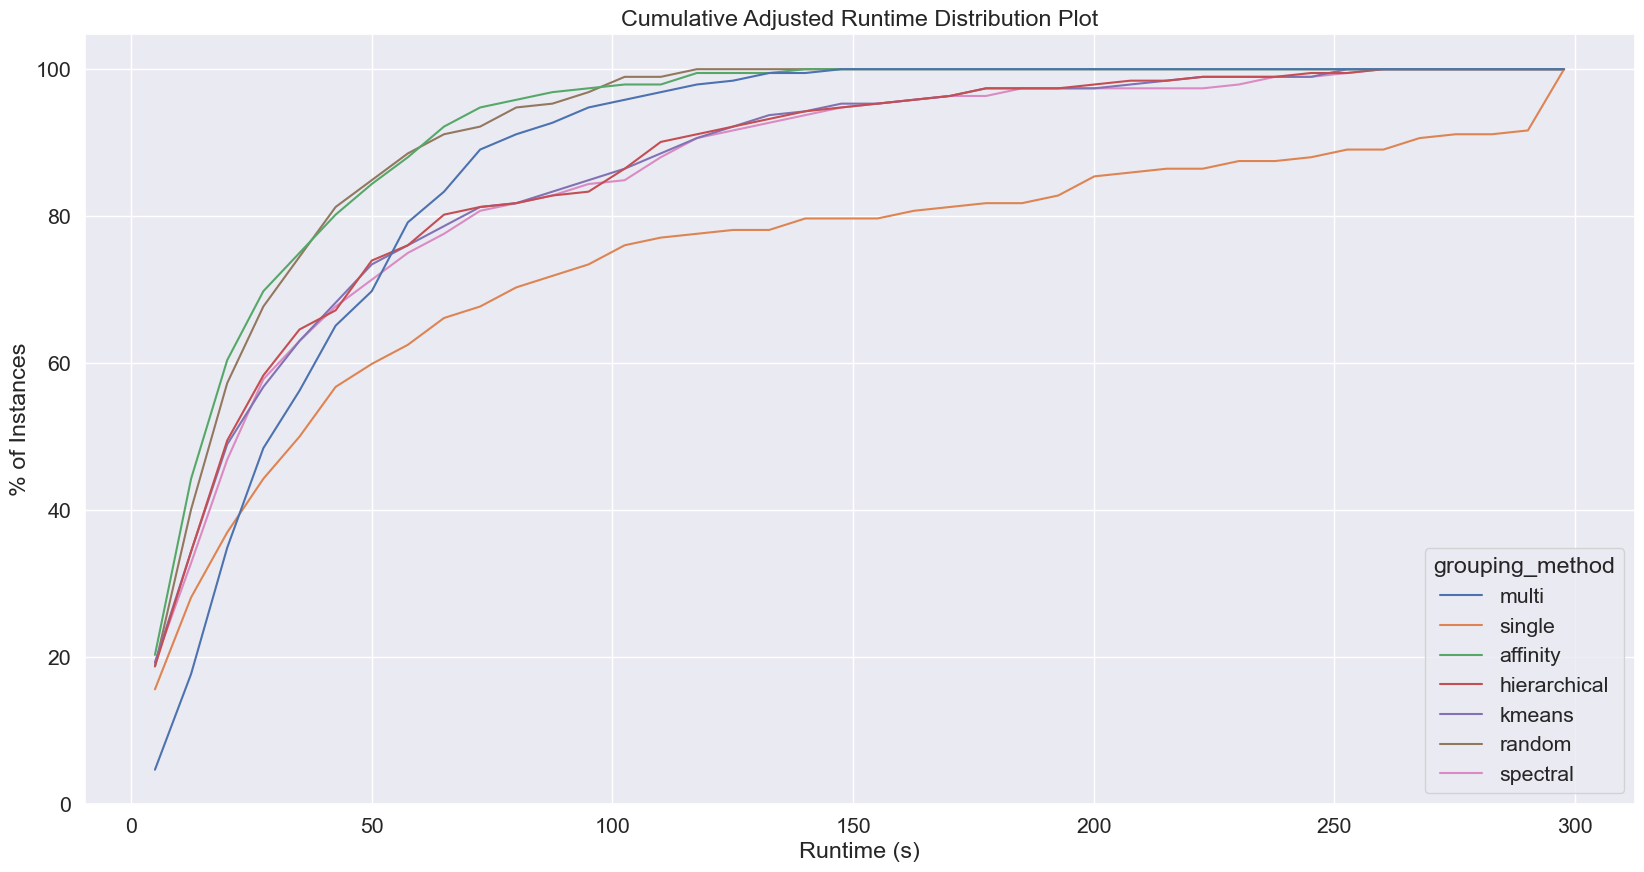

In [9]:
# Cumulative Runtime Distribution Plot without PCA no Dropout
subset = data[data['cut_method'] != 'dropout']

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.4)
plot = sns.histplot(data = subset,x = 'adj_runtime',hue = 'grouping_method',
                    element='poly', fill = False, cumulative=True,
                    stat = "percent", common_norm=False, ax = ax)
plot.set(title='Cumulative Adjusted Runtime Distribution Plot')
plot.set(xlabel='Runtime (s)', ylabel='% of Instances')

[Text(0.5, 0, 'Runtime (s)'), Text(0, 0.5, '% of Instances')]

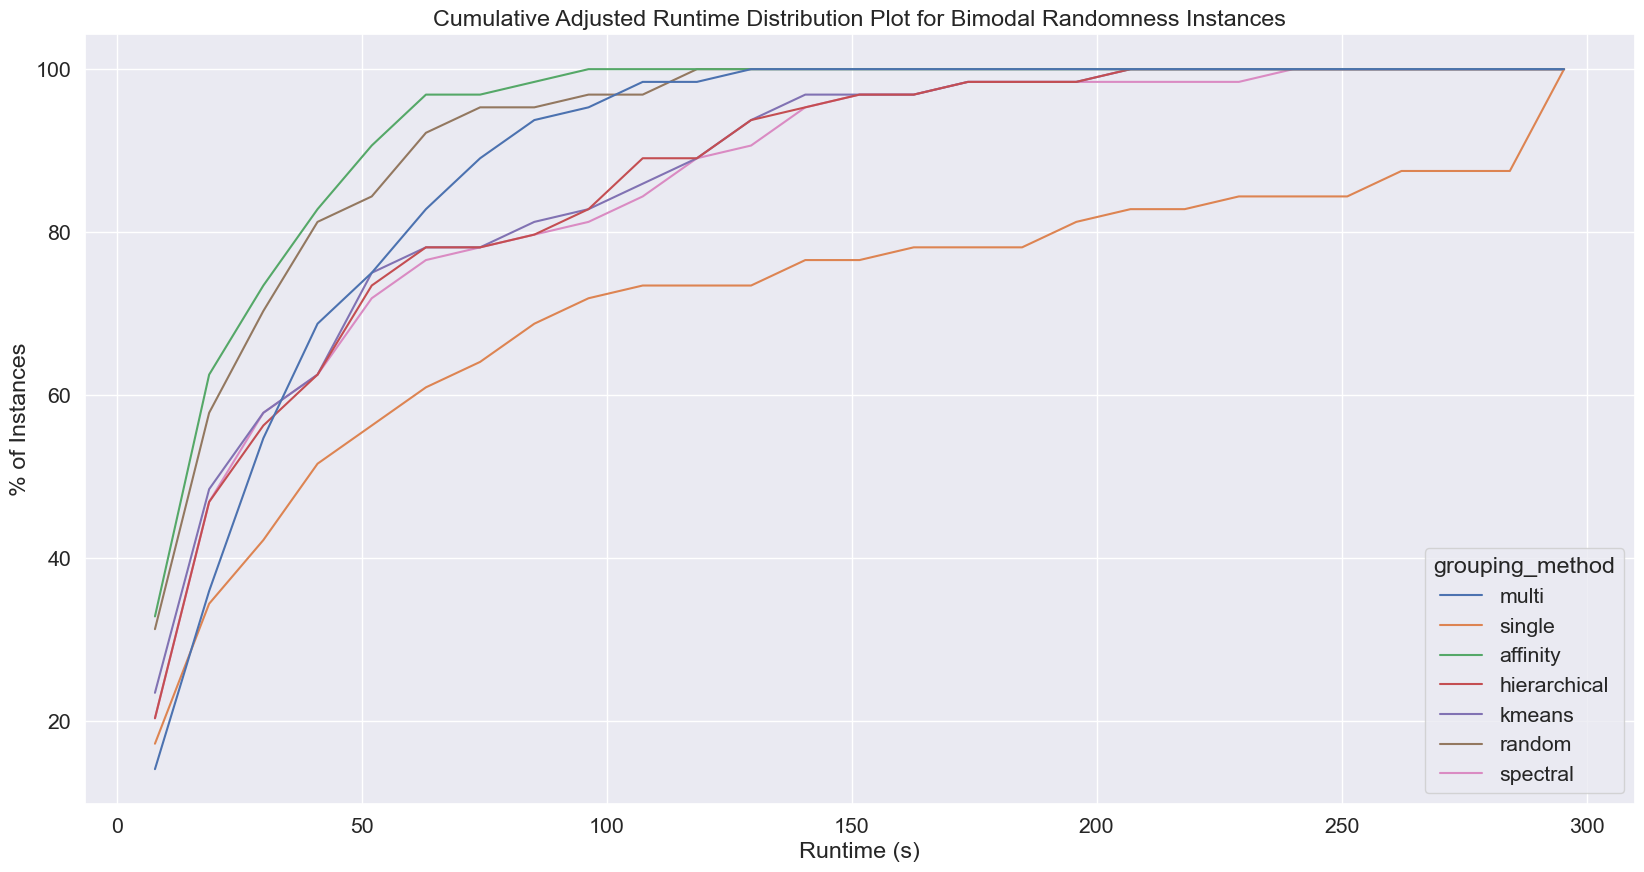

In [22]:
subset = data[(data['cut_method'] != 'dropout') & (data['distribution'] == 'multipeak')]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.4)
plot = sns.histplot(data = subset,x = 'adj_runtime',hue = 'grouping_method',
                    element='poly', fill = False, cumulative=True,
                    stat = "percent", common_norm=False, ax = ax)
plot.set(title='Cumulative Adjusted Runtime Distribution Plot for Bimodal Randomness Instances')
plot.set(xlabel='Runtime (s)', ylabel='% of Instances')

[Text(0.5, 0, 'Runtime (s)'), Text(0, 0.5, '% of Instances')]

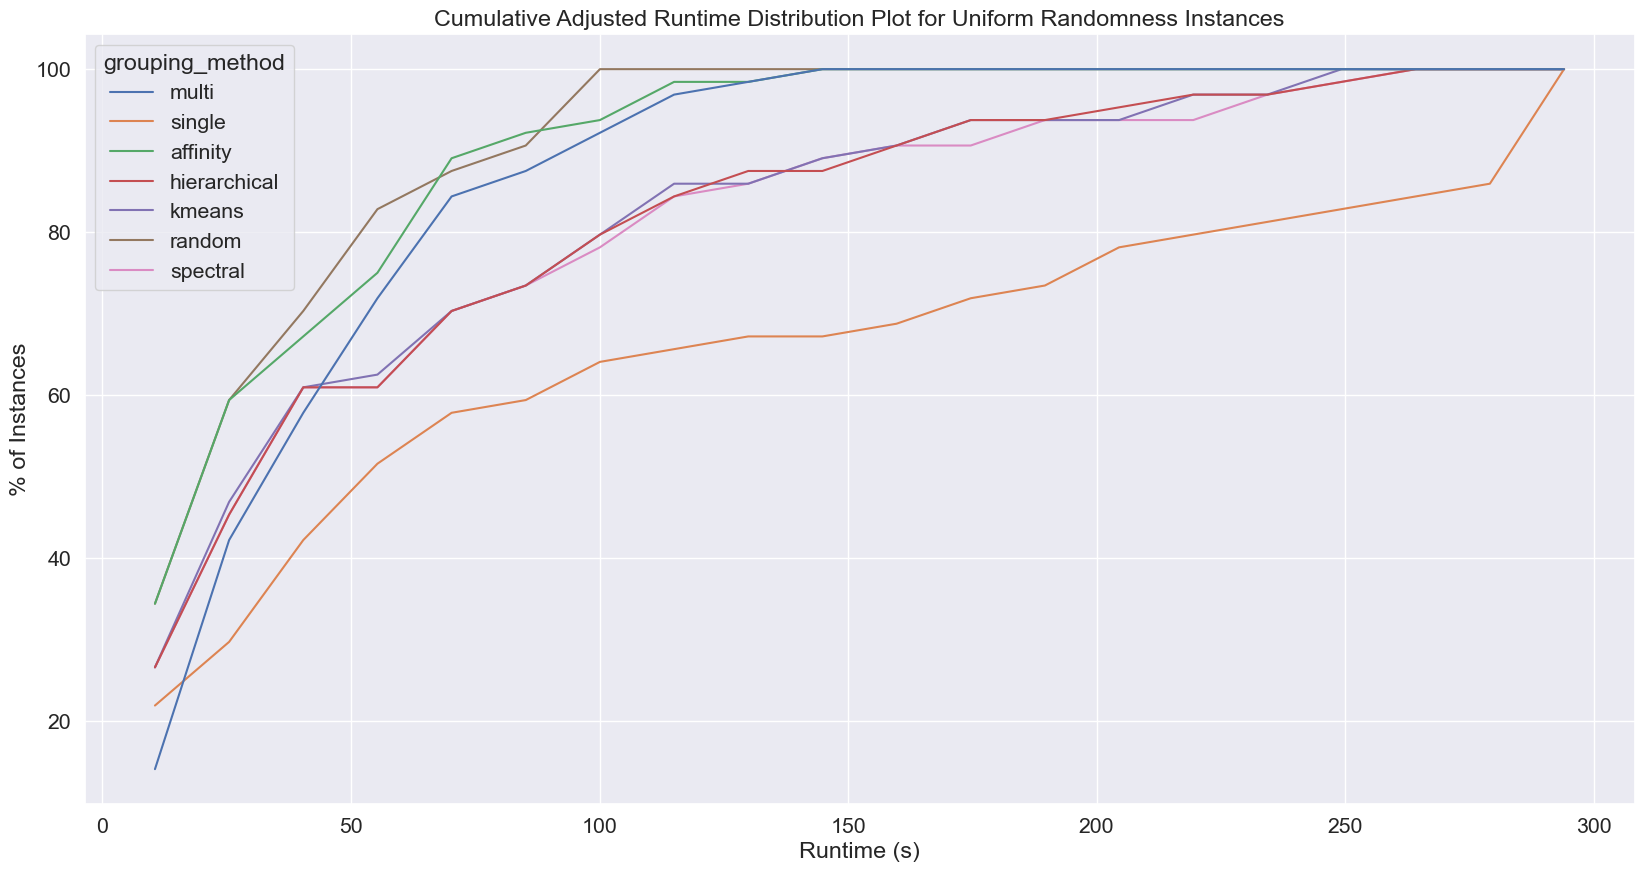

In [23]:
subset = data[(data['cut_method'] != 'dropout') & (data['distribution'] == 'uniform')]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.4)
plot = sns.histplot(data = subset,x = 'adj_runtime',hue = 'grouping_method',
                    element='poly', fill = False, cumulative=True,
                    stat = "percent", common_norm=False, ax = ax)
plot.set(title='Cumulative Adjusted Runtime Distribution Plot for Uniform Randomness Instances')
plot.set(xlabel='Runtime (s)', ylabel='% of Instances')

[Text(0.5, 0, 'Runtime (s)'), Text(0, 0.5, '% of Instances')]

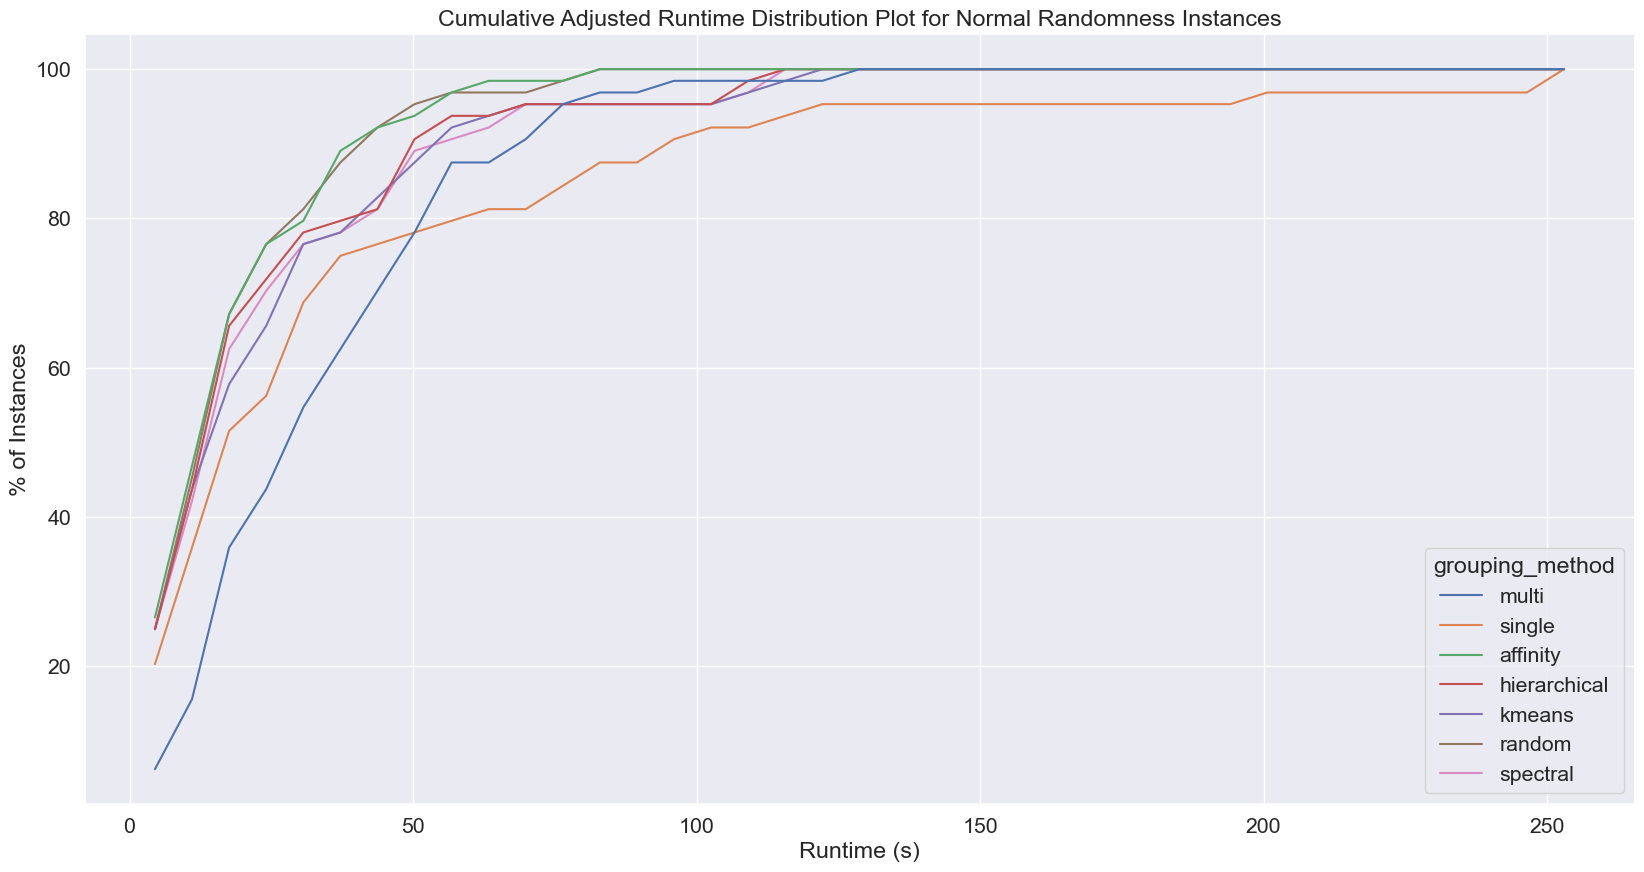

In [24]:
subset = data[(data['cut_method'] != 'dropout') & (data['distribution'] == 'normal')]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.4)
plot = sns.histplot(data = subset,x = 'adj_runtime',hue = 'grouping_method',
                    element='poly', fill = False, cumulative=True,
                    stat = "percent", common_norm=False, ax = ax)
plot.set(title='Cumulative Adjusted Runtime Distribution Plot for Normal Randomness Instances')
plot.set(xlabel='Runtime (s)', ylabel='% of Instances')

<AxesSubplot:xlabel='grouping_method', ylabel='adj_runtime'>

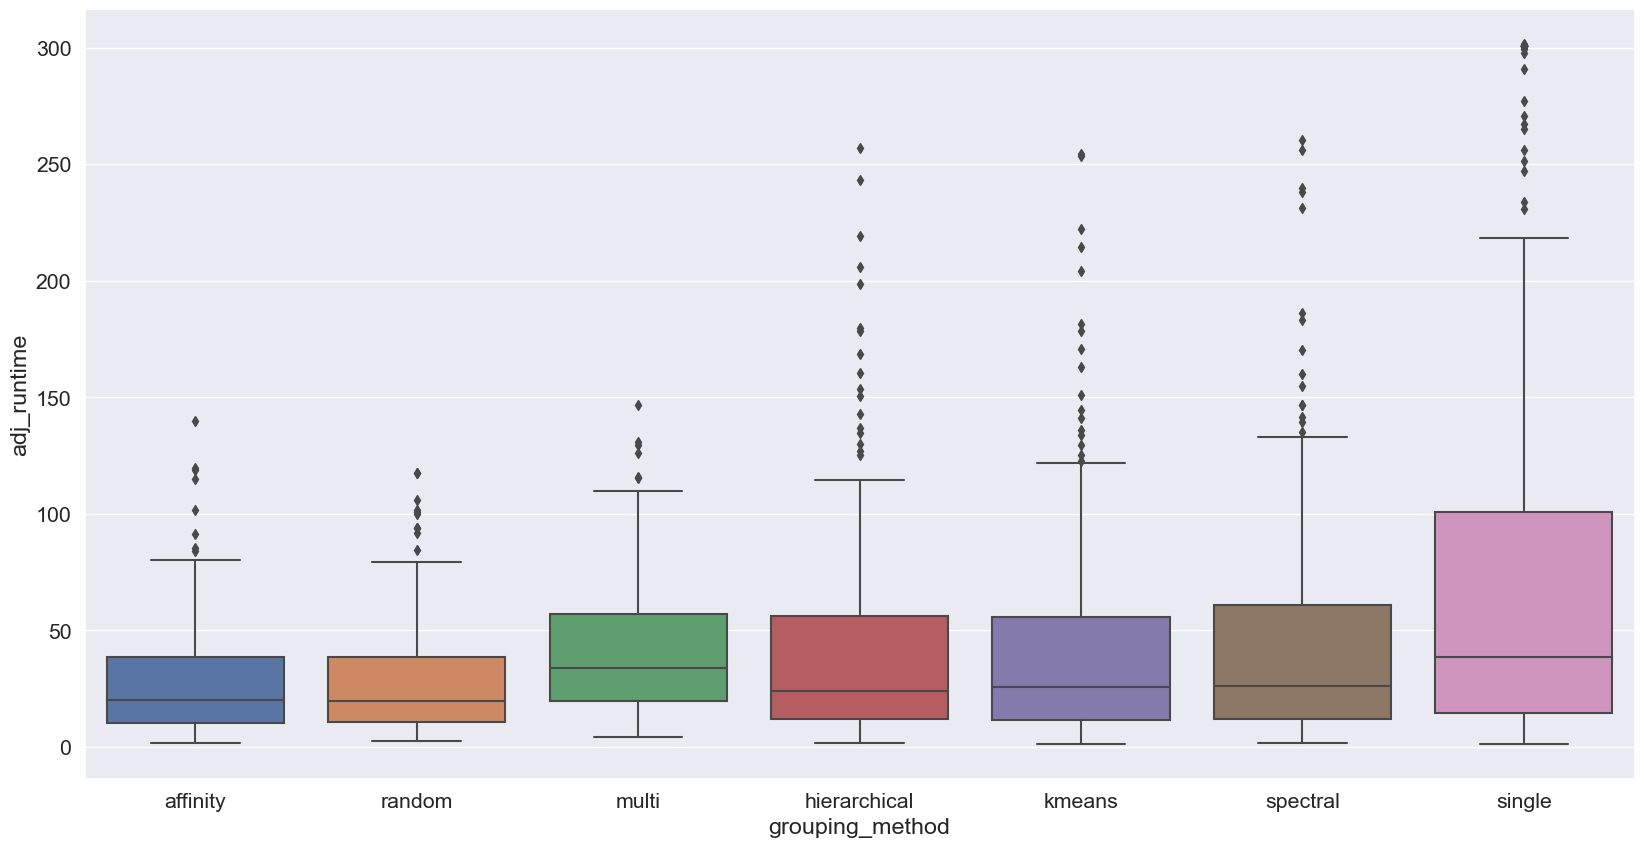

In [13]:
subset = data[data['cut_method'] != 'dropout']
order_df = subset[['grouping_method','adj_runtime']]
order_df = order_df.groupby(by = 'grouping_method').mean()
order_df = order_df.sort_values(by = 'adj_runtime')
order = order_df.index
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(data = subset, x = 'grouping_method', y = 'adj_runtime', ax = ax, order = order)

## Dropout Analysis

In [14]:
baseline = data[data['cut_method'] == 'multi']
baseline = baseline[['instance_name', 'obj_val']]
baseline.columns = ['instance_name','true_obj_val']
dropout_data = data[data['cut_method'] == 'dropout']
dropout_data = pd.merge(dropout_data, baseline, how = 'left', on = 'instance_name')
dropout_data['gap_perc'] = (dropout_data['true_obj_val'] - dropout_data['obj_val']) / dropout_data['true_obj_val'] * 100

[Text(0.5, 0, 'Grouping Method'), Text(0, 0.5, 'Difference from Optimal (%)')]

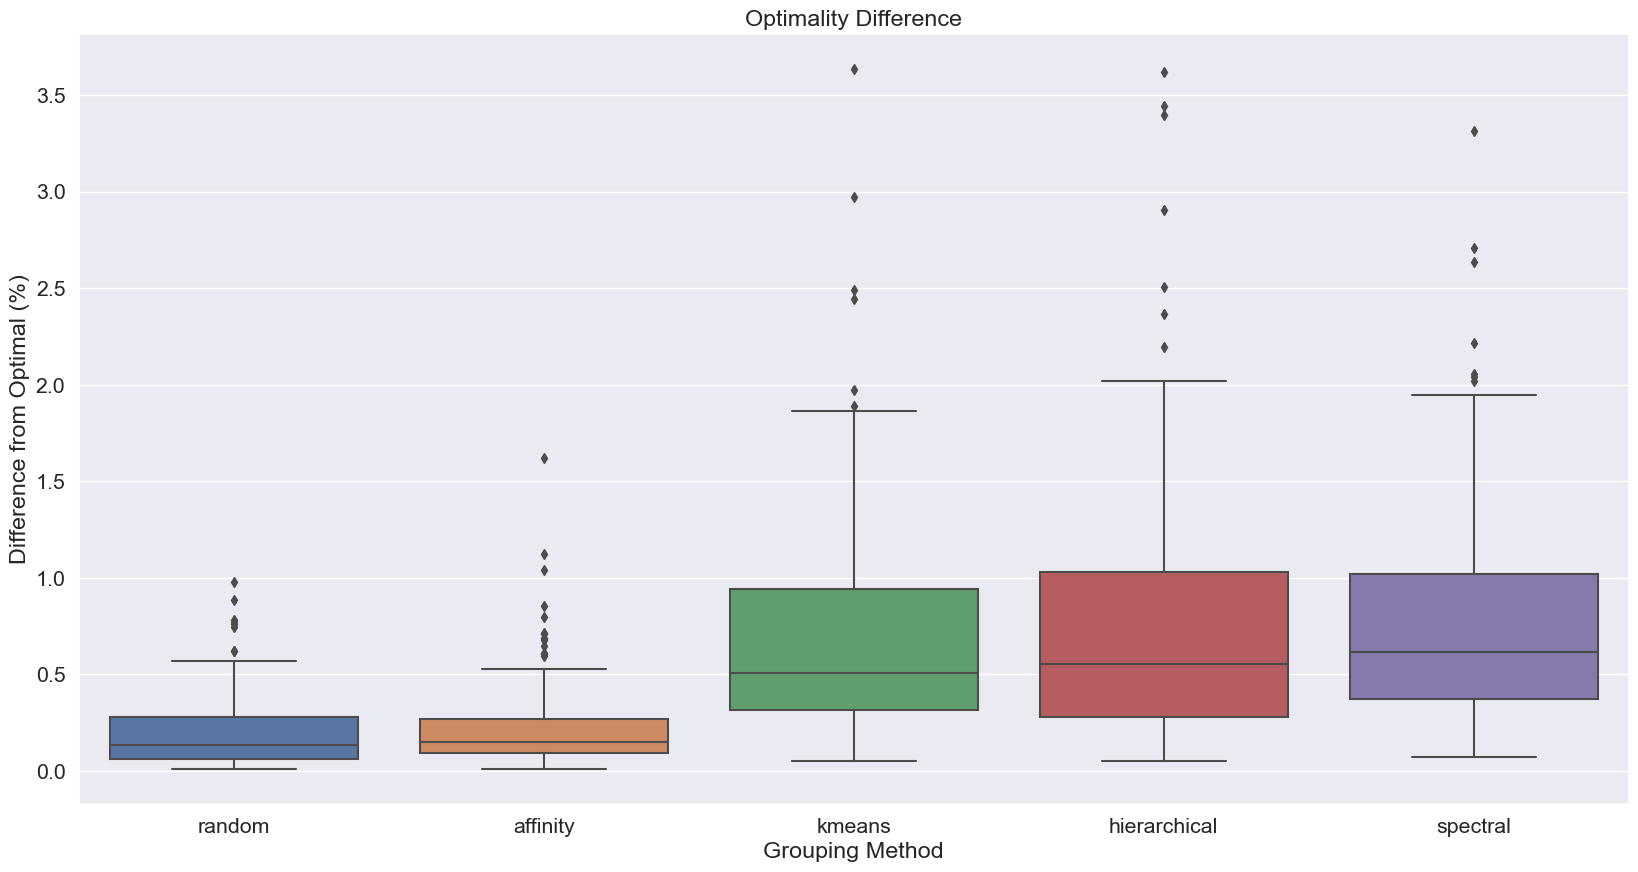

In [15]:
order_df = dropout_data[['grouping_method','gap_perc']]
order_df = order_df.groupby(by = 'grouping_method').mean()
order_df = order_df.sort_values(by = 'gap_perc')
order = order_df.index
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
plot = sns.boxplot(data = dropout_data, x = 'grouping_method', y = 'gap_perc', ax = ax, order = order)
plot.set(title='Optimality Difference')
plot.set(xlabel='Grouping Method', ylabel='Difference from Optimal (%)')

[Text(0.5, 0, 'Grouping Method'), Text(0, 0.5, 'Difference from Optimal (%)')]

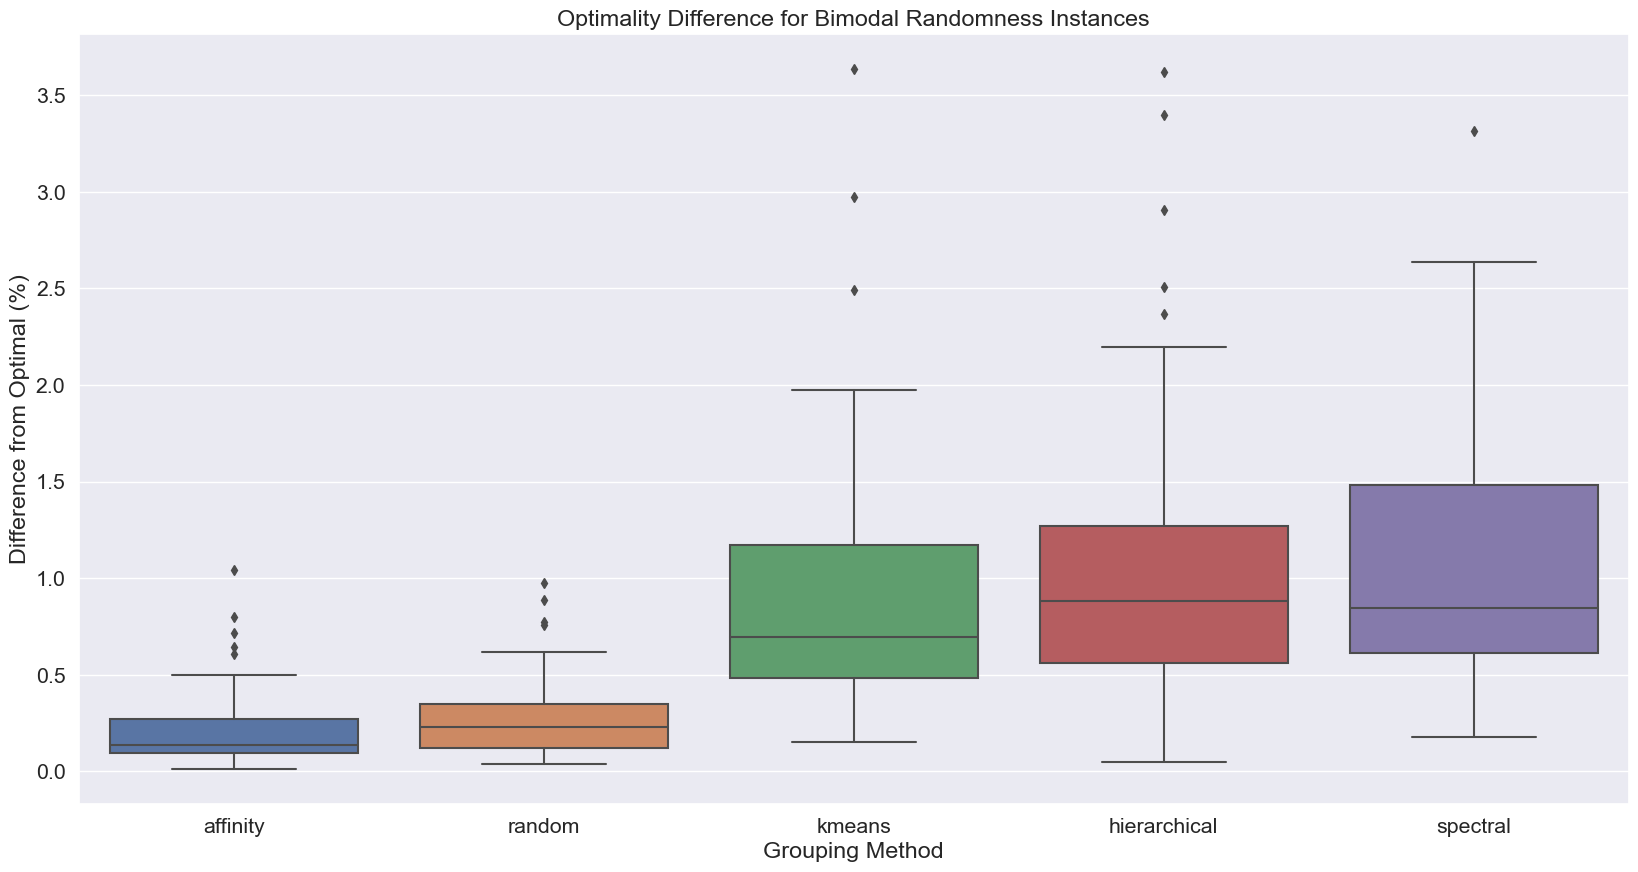

In [16]:
subset = dropout_data[dropout_data['distribution'] == 'multipeak']
order_df = subset[['grouping_method','gap_perc']]
order_df = order_df.groupby(by = 'grouping_method').mean()
order_df = order_df.sort_values(by = 'gap_perc')
order = order_df.index
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
plot = sns.boxplot(data = subset, x = 'grouping_method', y = 'gap_perc', ax = ax, order = order)
plot.set(title='Optimality Difference for Bimodal Randomness Instances')
plot.set(xlabel='Grouping Method', ylabel='Difference from Optimal (%)')

[Text(0.5, 0, 'Grouping Method'), Text(0, 0.5, 'Difference from Optimal (%)')]

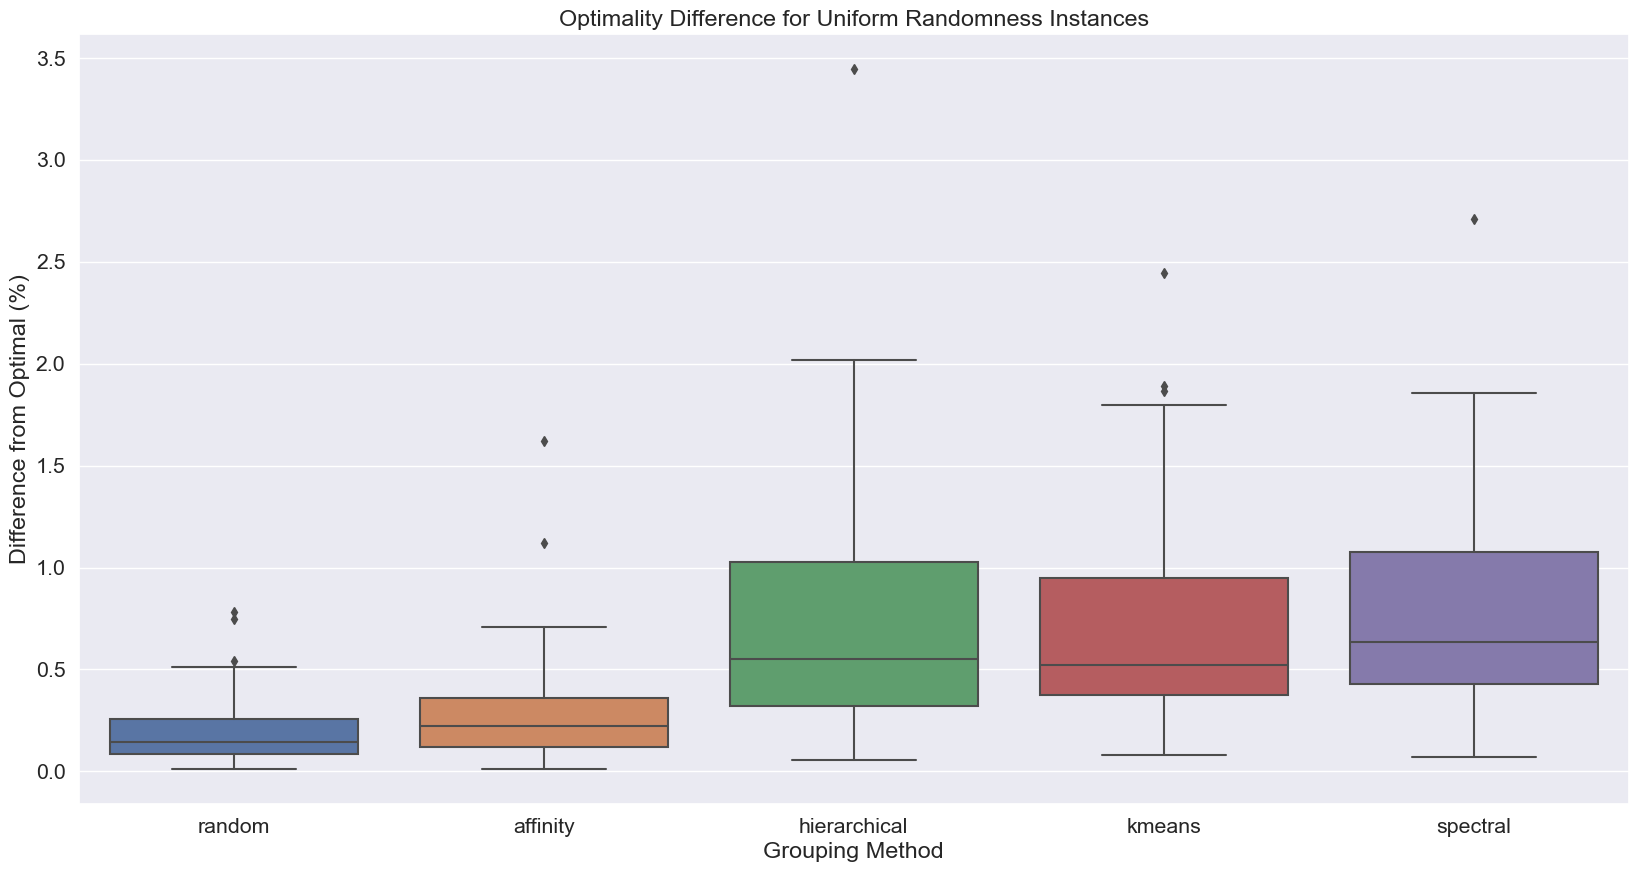

In [17]:
subset = dropout_data[dropout_data['distribution'] == 'uniform']
order_df = subset[['grouping_method','gap_perc']]
order_df = order_df.groupby(by = 'grouping_method').mean()
order_df = order_df.sort_values(by = 'gap_perc')
order = order_df.index
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
plot = sns.boxplot(data = subset, x = 'grouping_method', y = 'gap_perc', ax = ax, order = order)
plot.set(title='Optimality Difference for Uniform Randomness Instances')
plot.set(xlabel='Grouping Method', ylabel='Difference from Optimal (%)')

[Text(0.5, 0, 'Grouping Method'), Text(0, 0.5, 'Difference from Optimal (%)')]

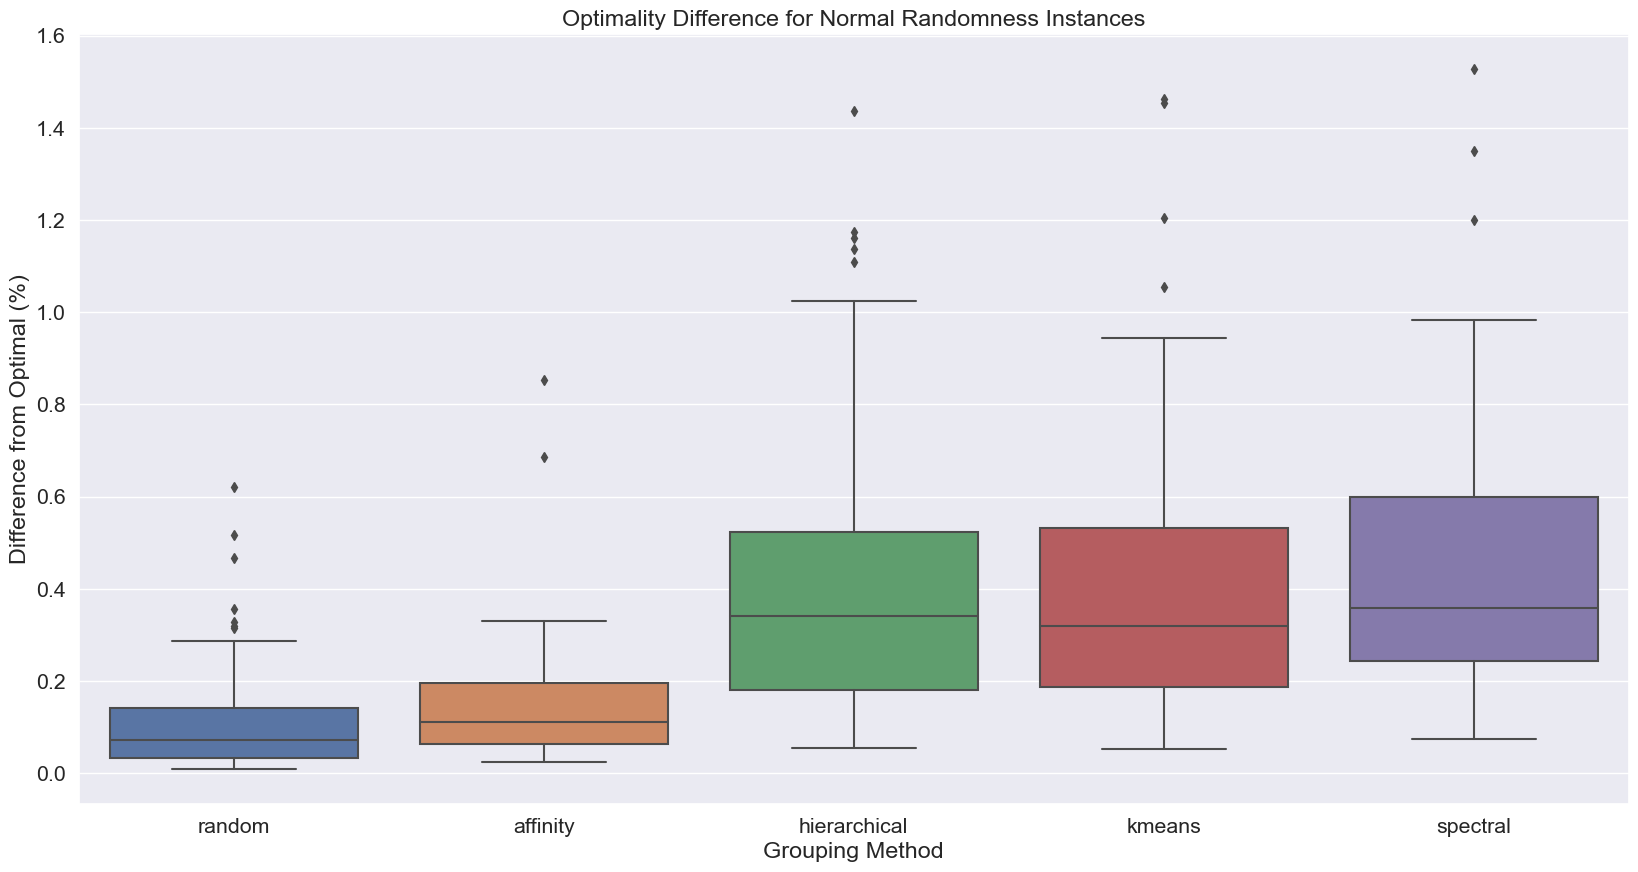

In [18]:
subset = dropout_data[dropout_data['distribution'] == 'normal']
order_df = subset[['grouping_method','gap_perc']]
order_df = order_df.groupby(by = 'grouping_method').mean()
order_df = order_df.sort_values(by = 'gap_perc')
order = order_df.index
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
plot = sns.boxplot(data = subset, x = 'grouping_method', y = 'gap_perc', ax = ax, order = order)
plot.set(title='Optimality Difference for Normal Randomness Instances')
plot.set(xlabel='Grouping Method', ylabel='Difference from Optimal (%)')

[Text(0.5, 0, 'Difference from Optimal (%)'), Text(0, 0.5, '% of Instances')]

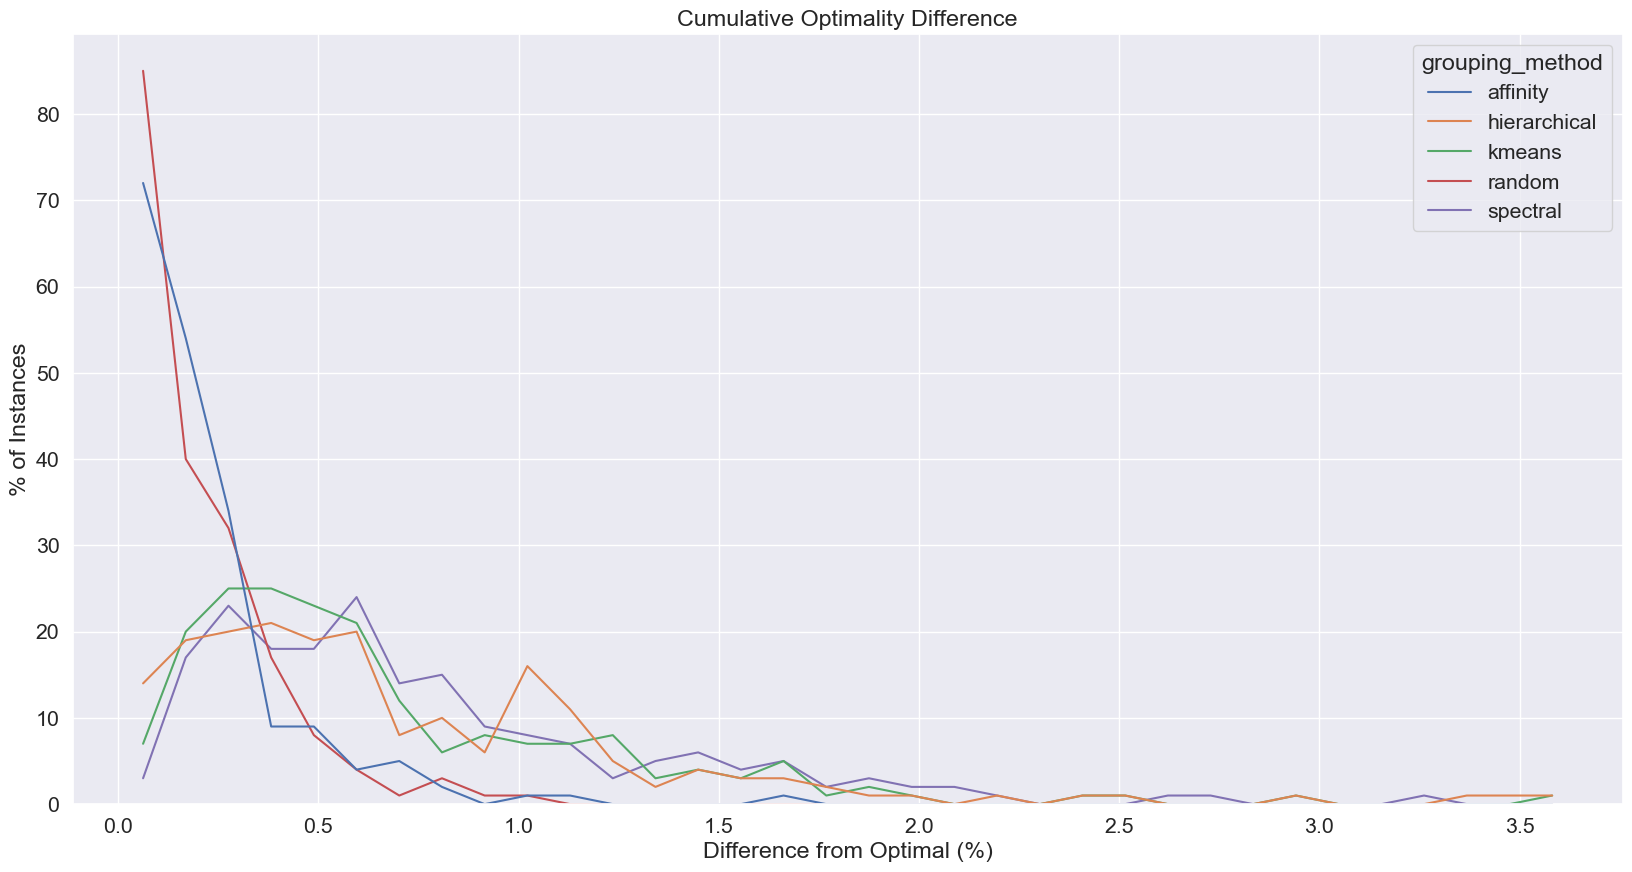

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
plot = sns.histplot(data = dropout_data,x = 'gap_perc',hue = 'grouping_method',
                    element='poly', fill = False, cumulative=False,
                    stat = "count", common_norm=False, ax = ax)
plot.set(title='Optimality Difference Distribution')
plot.set(xlabel='Number of Instances', ylabel='% of Instances')